In [2]:
import matplotlib.pyplot as plt
import sscPhantom
import numpy as np
from sscRadon import radon
import matplotlib.pyplot as plt

## Define complex phantom

mario: (64, 64, 64) 524.3KB
-15.707963267948966 15.707963267948966
-3.1415926535897927 3.1415926535897927


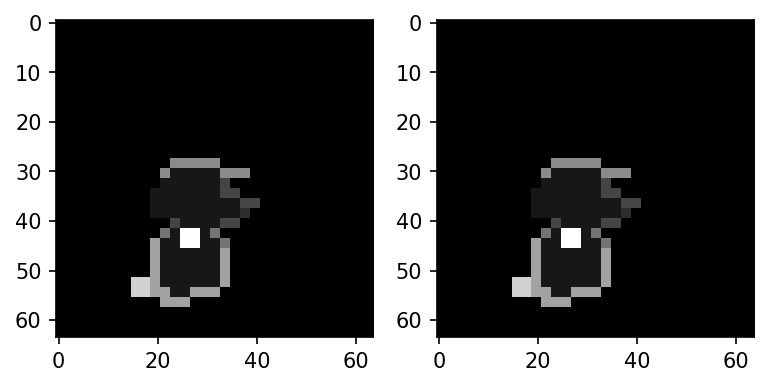

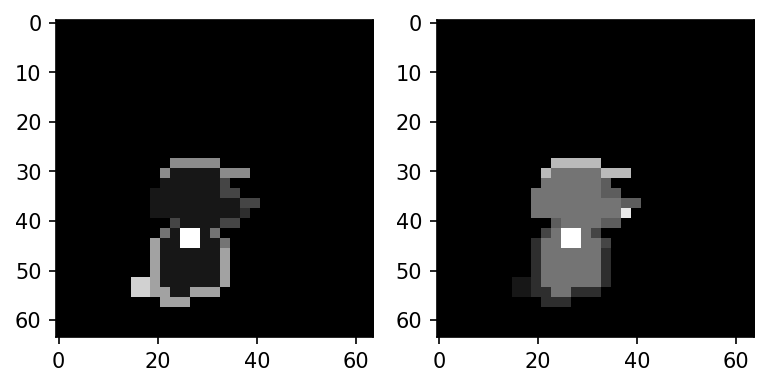

In [4]:
N = 64
Z=0.5
noise = False
unwrap = False

path_tomo = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/object_phantom_complex.npy"
path_phantom = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/phantom_complex.npy"

mario = sscPhantom.mario.createMario(shape=N, noise=noise, zoom=Z)
phase = 2*np.pi*mario/mario.max() - np.pi
phase = 5*phase

print(np.min(phase),np.max(phase))

if unwrap == True:
    phase = 20*phase
    gradient = np.ones_like(phase)
    values = np.linspace(0,1,phase.shape[0])*2*np.pi
    for i in range(phase.shape[0]):
        gradient[i,:,:] = gradient[i,:,:]*values[i]
        gradient[:,i,:] = gradient[:,i,:]*values[i]
    phase = phase + gradient 
    
# phase = np.flip(phase,axis=1)
phase = np.roll(phase,-6,axis=1)
phase = np.roll(phase,9,axis=0)

magnitude = mario/mario.max() + 1
magnitude = np.roll(magnitude,-6,axis=1)
magnitude = np.roll(magnitude,9,axis=0)

phantom = magnitude*np.exp(1j*phase)

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(magnitude[:,:,phantom.shape[0]//2],cmap='gray')
ax[1].imshow(phase[:,:,phantom.shape[0]//2],cmap='gray')

magnitude = np.abs(phantom)
phase = np.angle(phantom)
print(np.min(phase),np.max(phase))

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(magnitude[:,:,phantom.shape[0]//2],cmap='gray')
ax[1].imshow(phase[:,:,phantom.shape[0]//2],cmap='gray')

np.save(path_phantom,phantom)

## Get phantom projections

-3.1415926535897927 3.1415926535897927
0.0 6.283185307179585
-3.1415927 3.1415927
-2.8607376 3.1415925


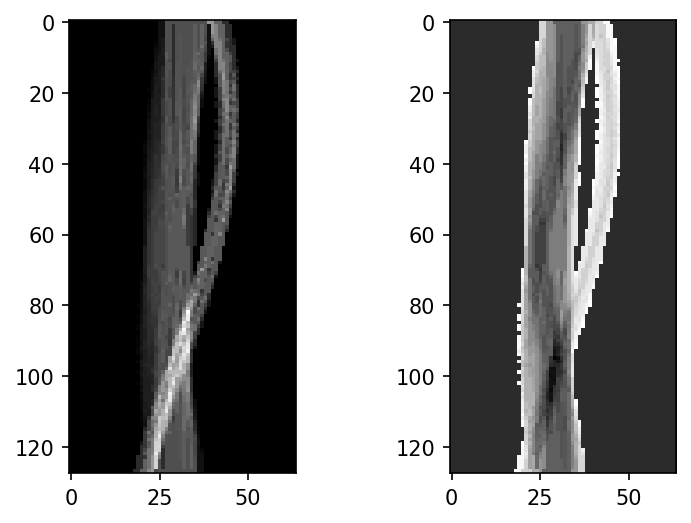

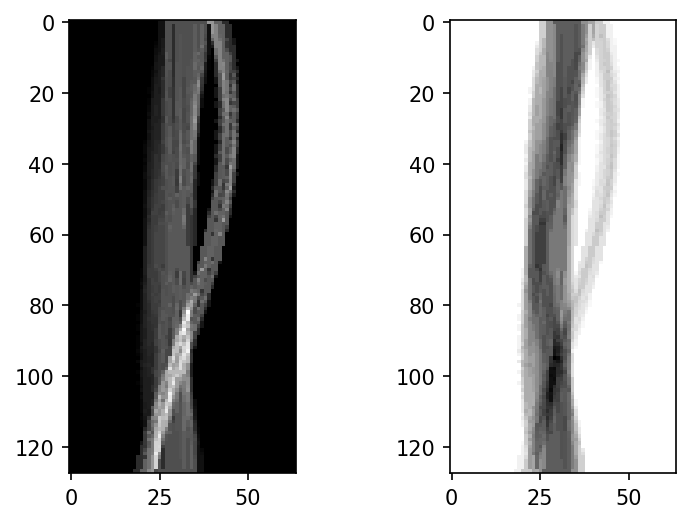

In [5]:
gpus    = [5]
nangles = 2*N
magnitude = np.abs(phantom) - 1
phase = np.angle(phantom)
print(np.min(phase),np.max(phase))

minimum = np.min(phase)
phase = phase - minimum
print(np.min(phase),np.max(phase))

tomogram_magnitude = np.swapaxes( radon.radon_gpu_block( magnitude, nangles, gpus, blocksize=10 ), 0, 1)
tomogram_phase     = np.swapaxes( radon.radon_gpu_block( phase, nangles, gpus, blocksize=10 ), 0, 1)

tomogram_phase = 2*np.pi*tomogram_phase/np.max(tomogram_phase) - np.pi
tomogram_phase = -tomogram_phase
print(np.min(tomogram_phase),np.max(tomogram_phase))


# noise = np.random.normal(0, phantom.max()/100, tomogram_magnitude.shape)
# tomogram_magnitude = tomogram_magnitude + 1 * noise

# noise = np.random.normal(0, phantom.max()/100, tomogram_phase.shape)
# tomogram_phase = tomogram_phase + 1 * noise

tomogram = tomogram_magnitude*np.exp(1j*tomogram_phase)
print(np.min(np.angle(tomogram)),np.max(np.angle(tomogram)))

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(np.abs(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')
ax[1].imshow(np.angle(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(tomogram_magnitude[:,tomogram.shape[1]//2,:],cmap='gray')
ax[1].imshow(tomogram_phase[:,tomogram.shape[1]//2,:],cmap='gray')

np.save(path_tomo,tomogram)

In [ ]:
# path = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/data/ptycho3d/phantom_complex/positions"

# angles = np.linspace(-90,90,tomogram.shape[0])*np.pi/180

# for i, angle_number in enumerate(range(tomogram.shape[0])): 
#     filename = str(angle_number).zfill(4)+f"_phantom_complex_001.txt"
#     line = f"Ry: {angles[i]}\tPiezoB2\tPiezoB3\tPiezoB1\t"
#     print(line)
#     with open(os.path.join(path,filename), 'w') as f:
#         f.write(line)

In [6]:
# Get tomogram angles
# Loop
    # Get probe
    # Get tomogram frame
    # Get positions
    # Save positions file
    # Loop:
        # Get output wave for each position
        # FT and intensity
        # Populate dataset
    # Save hdf5

import numpy as np
import h5py


def create_hdf(path,data):
    hf = h5py.File(path, 'w')
    g2 = hf.create_group('entry/data')
    g2.create_dataset('data', data=data)
    hf.close()

d1 = np.ones((100,1,100,100),dtype='int32')



create_hdf('/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/data/ptycho3d/phantom_complex/scans/data.hdf5',d1)
    

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, img_as_float, color, exposure
from skimage.restoration import unwrap_phase
import sscPhantom

N=256

# img = sscPhantom.mario.createMario(shape=N, noise=False, zoom=0.5)
img = sscPhantom.donuts.createDonuts( N, 50 , 1,{ 'HowMany': 10, 'radius': 0.07,   'Rtorus': 0.5,  'rtorus': 0.1})[1]
# img = sscPhantom.donuts.createDonuts( N, 50 , 1)[1]
print(img.shape)
# img = img[:,img.shape[1]//2,:]
# img = np.sum(img,axis=1)


# # Load an image as a floating-point grayscale
# image = color.rgb2gray(img_as_float(img))
# # Scale the image to [0, 4*pi]
# image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# # Create a phase-wrapped image in the interval [-pi, pi)
# image_wrapped = np.angle(np.exp(1j * image))
# # Perform phase unwrapping
# image_unwrapped = unwrap_phase(image_wrapped)

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# ax1, ax2, ax3, ax4 = ax.ravel()
# fig.colorbar(ax1.imshow(image, cmap='gray', vmin=0, vmax=4 * np.pi), ax=ax1)
# ax1.set_title('Original')
# fig.colorbar(ax2.imshow(image_wrapped, cmap='gray', vmin=-np.pi, vmax=np.pi), ax=ax2)
# ax2.set_title('Wrapped phase')
# image_unwrapped -= np.min(image_unwrapped)
# fig.colorbar(ax3.imshow(image_unwrapped, cmap='gray'), ax=ax3)
# ax3.set_title('After phase unwrapping')
# fig.colorbar(ax4.imshow(image_unwrapped - image, cmap='gray'), ax=ax4)
# ax4.set_title('Unwrapped minus original')

--> ssc-phantom: particles generated / elapsed: 46.63796257972717
sscPhantom: creating 2 256x256x256 shared arrays (Phantom)
Done: 256 images within 3.6003713607788086 sec
--> ssc-phantom: donuts created / elapsed: 3.6009371280670166
(256, 256, 256)


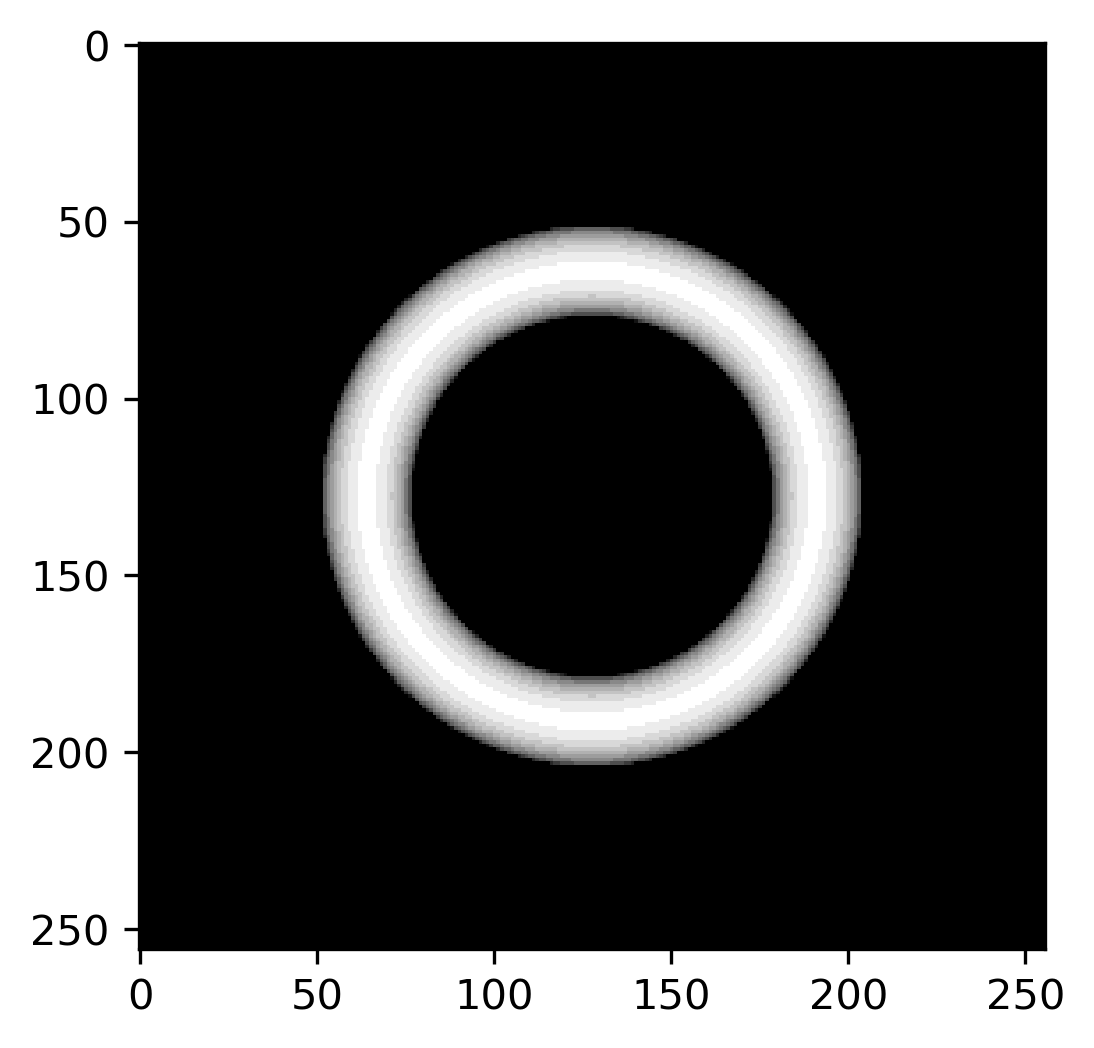

In [14]:
# img2 = img[:,img.shape[1]//2,:]
img2 = np.sum(img,axis=1)

import numpy as np
np.max(img), np.min(img)
plt.figure(dpi=300)
plt.imshow(img2,cmap='gray')
